# グラフの読み込み

In [57]:
from Graphs import MakeGraph ,GraphAxis , GraphViewOptions
import pandas as pd

folder_name = "data3"

make_graph = MakeGraph(folder_name=folder_name)

HartRate.csv


# HeartRate

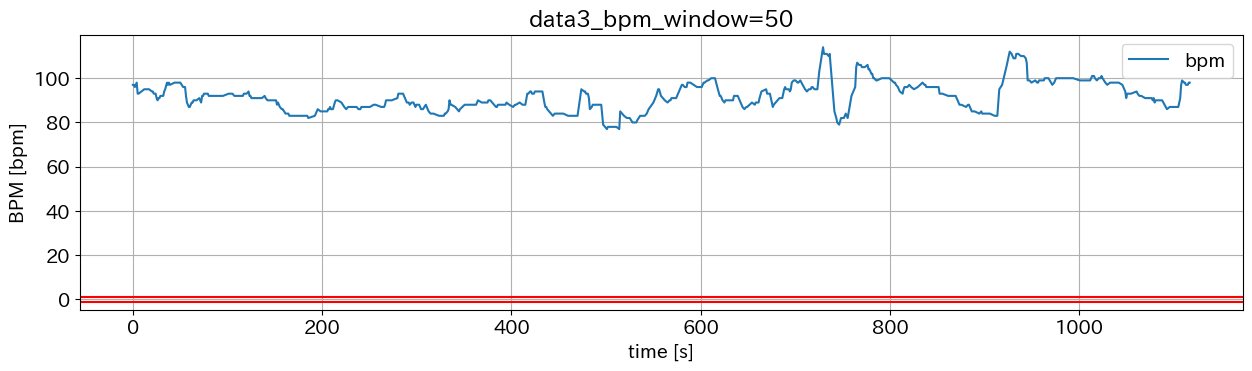

In [58]:
heart_rate_df = make_graph.heart_rate_df

# ソートをする
heart_rate_df = heart_rate_df.sort_values("time")

make_graph.plot(
    plt_lists=[
        heart_rate_df
    ],
    option=[GraphViewOptions.none],
    axis=GraphAxis.bpm,
    filter_num=50
)


# サンプリングレートの取得

In [59]:
heart_rate_df

,time,bpm
0,0.000,97
1,1.059,97
2,2.061,96
3,3.054,97
4,4.063,98
...,...,...
622,1111.569,98
623,1112.625,97
624,1114.630,97
625,1115.628,98


In [60]:
sampling_rate = heart_rate_df["time"].diff().mean()

In [61]:
sampling_rate

1.7837476038338658

In [62]:
heart_rate_df_diff = heart_rate_df.copy()
heart_rate_df_diff["bpm"] = heart_rate_df_diff["bpm"].diff()
# ソートする
heart_rate_df_diff = heart_rate_df_diff.sort_values("time")
heart_rate_df_diff = make_graph.low_filter(heart_rate_df_diff, 10)
heart_rate_df_diff

,time,bpm
0,0.000,NaN
1,1.059,NaN
2,2.061,NaN
3,3.054,NaN
4,4.063,NaN
...,...,...
622,1111.569,0.8
623,1112.625,1.1
624,1114.630,1.0
625,1115.628,1.1


1.059 nan nan
2.061 nan nan
3.054 nan nan
4.063 nan nan
5.068 nan nan
6.015 nan nan
12.025 nan nan
13.078 nan nan
14.074 nan nan
17.086 nan -0.2
20.124 -0.2 -0.3
21.097 -0.3 -0.2
22.093 -0.2 -0.4
23.091 -0.4 -0.5
24.037 -0.5 0.0
25.093 0.0 -0.2
26.095 -0.2 -0.5
27.09 -0.5 -0.4
28.099 -0.4 -0.4
29.104 -0.4 -0.3
30.049 -0.3 -0.2
31.111 -0.2 -0.2
32.103 -0.2 -0.1
33.112 -0.1 0.1
34.109 0.1 0.2
36.068 0.2 0.7
37.119 0.7 0.7
38.115 0.7 0.7
39.128 0.7 0.6
44.131 0.6 0.6
45.127 0.6 0.6
48.079 0.6 0.6
49.141 0.6 0.6
50.141 0.6 0.4
53.14 0.4 0.1
54.083 0.1 -0.2
55.142 -0.2 -0.1
56.134 -0.1 -0.6
57.145 -0.6 -0.8
58.147 -0.8 -1.0
59.143 -1.0 -1.1
60.096 -1.1 -1.1
61.181 -1.1 -1.0
62.149 -1.0 -0.9
59.143 62.149
63.158 -0.9 -0.7
64.145 -0.7 -0.6
67.154 -0.6 -0.6
70.187 -0.6 -0.1
72.112 -0.1 0.0
73.167 0.0 0.4
74.167 0.4 0.5
75.162 0.5 0.6
79.181 0.6 0.5
80.172 0.5 0.3
82.178 0.3 0.3
84.136 0.3 0.2
86.183 0.2 0.2
87.189 0.2 0.1
89.191 0.1 0.3
91.189 0.3 0.0
92.195 0.0 0.0
94.192 0.0 -0.1
95.202 -0.1

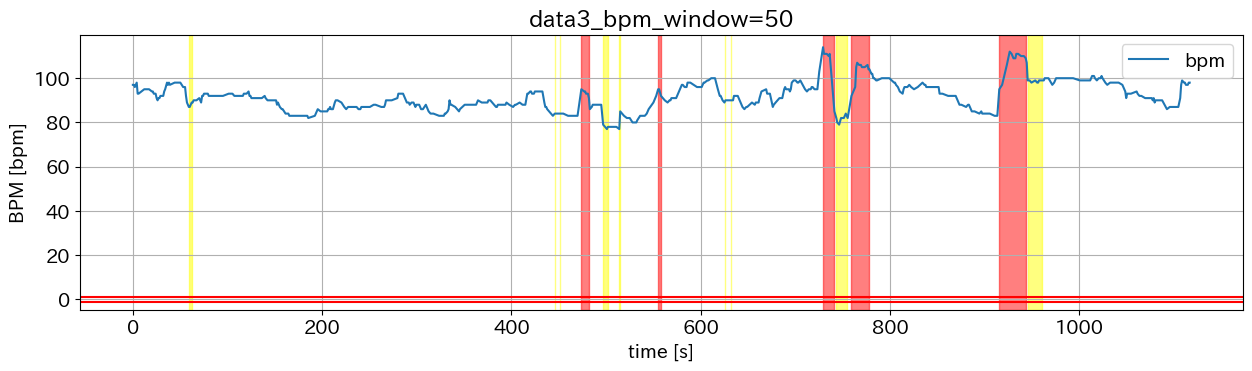

In [63]:



color_intervals = []

# 初期化
start_time = None
previous_bpm = None

for index, row in heart_rate_df_diff.iterrows():
    time = row["time"]
    bpm = row["bpm"]

    if previous_bpm is not None:
        print(time,previous_bpm, bpm)

        if previous_bpm >= 1 and bpm < 1:
            end_time = time
            color_intervals.append([start_time, end_time, "red"])
            start_time = None
            
        elif previous_bpm <= -1 and bpm > -1:
            end_time = time
            color_intervals.append([start_time, end_time, "yellow"])
            print(start_time, end_time)
            start_time = None

    if start_time is None:
        if bpm > 1:
            start_time = time
        elif bpm < -1:
            start_time = time

    previous_bpm = bpm
    

color_list = pd.DataFrame(
    data=color_intervals,
    columns=["start_time","end_time","color"]
)

make_graph.plot(
    plt_lists=[
        heart_rate_df
    ],
    option=[GraphViewOptions.none],
    axis=GraphAxis.bpm,
    
    filter_num=50,
    color_list=color_list
)